In [3]:
import pandas as pd
df=pd.read_csv('titanic_cleaned.csv')
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,343,0,2,Collander Mr. Erik Gustaf,0,28.0,0,0,159,13.0000,0
1,1,76,0,3,Moen Mr. Sigurd Hansen,0,25.0,0,0,347,7.6500,0
2,2,641,0,3,Jensen Mr. Hans Peder,0,20.0,0,0,409,7.8542,0
3,3,568,0,3,Palsson Mrs. Nils (Alma Cornelia Berglund),1,29.0,0,4,395,21.0750,0
4,4,672,0,1,Davidson Mr. Thornton,0,31.0,1,0,569,52.0000,0


In [6]:
from sklearn.model_selection import train_test_split
y=df['Survived']
X=df.drop('Survived', axis='columns', inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

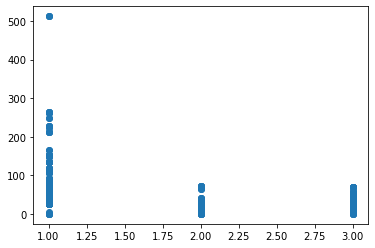

In [16]:
import matplotlib.pyplot as plt
plt.scatter(df['Pclass'], df['Fare'])

In [26]:
#Linear regression

#Importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

#extract x and y from our data
x=df["Age"].values[:,np.newaxis]
y=df["Survived"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

#error measurement
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 0.23783732657301604
R squared 0.004084969332659227


In [27]:
#a
model.coef_

array([-0.0023479])

In [28]:
#b
model.intercept_

0.4474442157487811

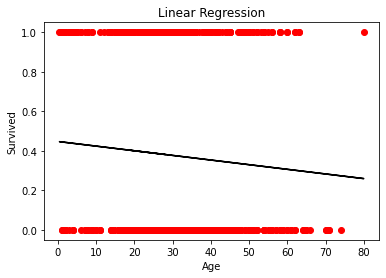

In [29]:
#plot of linear regression
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("Survived")
plt.xlabel("Age")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [31]:
#Multi-linear Regression Code
#extract x and y from our data
x=df[["Age","Sex", 'Pclass', 'Fare', 'Embarked']]  #we have more than one input
y=df["Survived"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 0.14654777295553784
R squared 0.38634893058958686


In [32]:
#a
model.coef_

array([-4.90259143e-03,  5.13224693e-01, -1.68618524e-01, -2.35057752e-04,
        3.97382865e-02])

In [33]:
#b
model.intercept_

0.7254312775038724

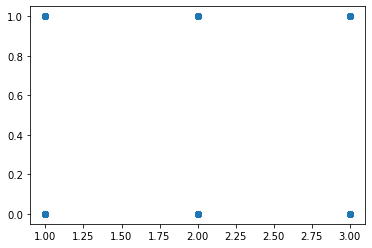

In [37]:
plt.scatter(df['Pclass'], df['Survived'])

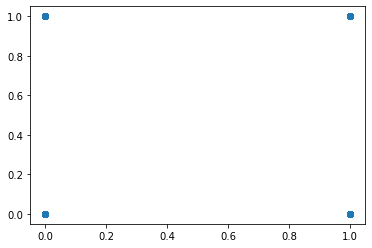

In [38]:
plt.scatter(df['Sex'], df['Survived'])

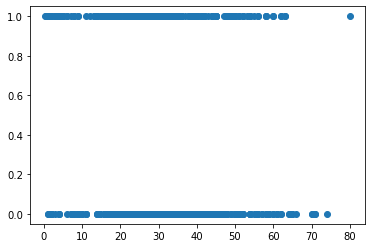

In [39]:
plt.scatter(df['Age'], df['Survived'])

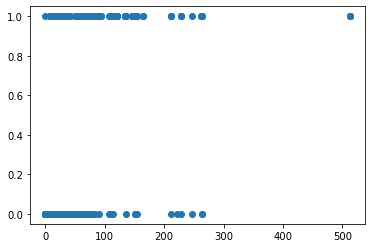

In [40]:
plt.scatter(df['Fare'], df['Survived'])

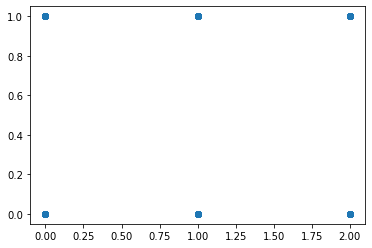

In [41]:
plt.scatter(df['Embarked'], df['Survived'])

In [44]:
#Polynomial Regression Code
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

# create matrix and vectors
x = [[0.44, 0.68], [0.99, 0.23]]
y = [109.85, 155.72]

lg = LinearRegression() 
poly = PolynomialFeatures(degree = 2) 

x_=poly.fit_transform(x)
lg.fit(x_, y) # Fitting Polynomial Regression to the dataset 

LinearRegression()

In [45]:
#Polynomial Regression prediction

x_test=[[0.49, 0.18]]
x_test_=poly.fit_transform(x_test)
lg.predict(x_test_)

array([126.84247142])

In [47]:
#polynomial regression

#Importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

from sklearn.metrics import mean_squared_error
from sklearn import metrics

x= df[["Age", "Sex"]]
y= df["Survived"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  0.1727882462408253
R squared:  0.2764701233678798


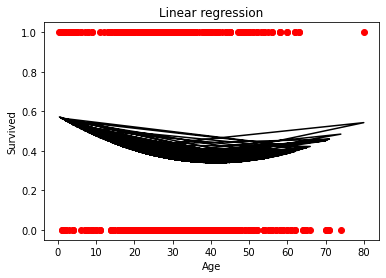

In [49]:
#polynomial regression visualization
x= df["Age"].values.reshape(-1,1)
y= df["Survived"].values
poly = PolynomialFeatures(degree = 2) 
x_poly = poly.fit_transform(x) 
poly.fit(x_poly, y) 
lg=LinearRegression()
lg.fit(x_poly, y) 

plt.scatter(x, y, color="r")
plt.title("Linear regression")
plt.ylabel("Survived")
plt.xlabel("Age")
plt.plot(x, lg.predict(poly.fit_transform(x)), color="k") 

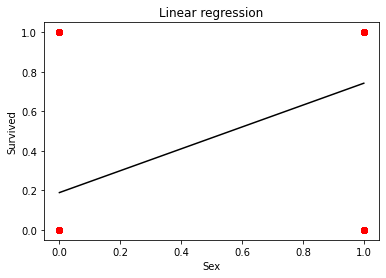

In [50]:
#polynomial regression visualization
x= df["Sex"].values.reshape(-1,1)
y= df["Survived"].values
poly = PolynomialFeatures(degree = 2) 
x_poly = poly.fit_transform(x) 
poly.fit(x_poly, y) 
lg=LinearRegression()
lg.fit(x_poly, y) 

plt.scatter(x, y, color="r")
plt.title("Linear regression")
plt.ylabel("Survived")
plt.xlabel("Sex")
plt.plot(x, lg.predict(poly.fit_transform(x)), color="k") 

In [ ]:
#outliers
#Detect the outliers using box plots or scatter plots, then delete them.
#Divide your data and perform two regressions instead of one:
